<a href="https://colab.research.google.com/github/ValerieLangat/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Valerie_Langat_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

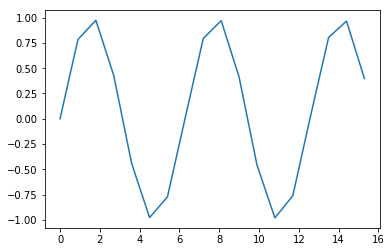

In [47]:
#Passes
v = np.arange(0,5*(np.pi), 0.9)
l = np.sin(v)

plt.plot(v,l)
plt.show()

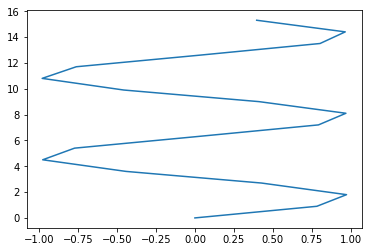

In [48]:
#Can "flip" my previous graph's x & y placements. This doesn't pass

plt.plot(l,v)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

In order to be considered a function, all inputs must be unique and correspond to a certain output. If a graph doesn't pass the vertical line test, that means there is a duplicate value

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [0]:
#1. Not a function. Duplicate x-value paired with different y values
#2. This is the only function. All unique inputs.
#3. Not a function. Duplicate x-value paired with different y values
#4. Not a function. Duplicate x-value paired with different y values
#5. Not a function. Duplicate x-value paired with different y values

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [0]:
#for function m, there are three inputs mapped to 3 outputs. R3 > R3
#for function n, there are four inputs mapped to 2 outputs. R4 > R2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [0]:
#I believe so. One could do this by using a kernel function. 
#For our linear algebra unit, that would be a KPCA, or kernal principal compnent analysis

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [88]:
def p(x1, x2):
    return np.array([[x1 + 3*x2], 
                     [2*x2 - x1]])

def q(x1, x2, x3):
    return np.array([[4*x1 + x2 + 2*x3],
                     [2*x2 - x1 + 3*x3],
                     [5*x1 - 2*x3 + x2]])


transf_p = np.column_stack((p(1, 0), p(0, 1)))
transf_q = np.column_stack((q(1, 0, 0), q(0, 1, 0), q(0, 0, 1)))

print(transf_p)
print(transf_q)

[[ 1  3]
 [-1  2]]
[[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [90]:
#My input matrix
mat1 = np.array([1, 2])
mat2 = np.array([1, 2, 3])

#Traditional
print(p(mat1[0], mat1[1]))
print(np.dot(transf_p, mat1))

#vector matrix
print(q(mat2[0], mat2[1], mat2[2]))
print(np.dot(transf_q, mat2))

[[7]
 [3]]
[7 3]
[[12]
 [12]
 [ 1]]
[12 12  1]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector is a vector that does not change it's orientation after a transformation. It only shrinks or stretches as a result of the scalar. The value of the scalar is our eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The basic challenge that comes with high dim. spaces is making sure you have enough data to pair with your features in order for your results to have statistical significance. The practice of data entry can be very time consuming and costly. This is where having data engineers building solid data pipelines would be important.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In machine learning, you should have at least 5 observations for each new parameter or feature.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(df.head())
print(df.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [54]:
new_species = {'setosa':0,'versicolor':1,'virginica':2}

df['species'].replace(new_species, inplace=True)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [55]:
means = mean(df.T, axis=1)
print("\n Means: \n", means)

centered = df - means
print("\n Centered: \n", centered)

covariance_mat = cov(centered.T)
print("\n Covariance Matrix: \n", covariance_mat)

evalues, evectors = eig(covariance_mat)
print("\n Eigenvectors: \n", evectors)
print("\n Eigenvalues: \n", evalues)

projected = evectors.T.dot(centered.T)
print("\n Projected Data: \n", projected.T)


 Means: 
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
species         1.000000
dtype: float64

 Centered: 
      sepal_length  sepal_width  petal_length  petal_width  species
0       -0.743333        0.446     -2.358667    -0.998667     -1.0
1       -0.943333       -0.054     -2.358667    -0.998667     -1.0
2       -1.143333        0.146     -2.458667    -0.998667     -1.0
3       -1.243333        0.046     -2.258667    -0.998667     -1.0
4       -0.843333        0.546     -2.358667    -0.998667     -1.0
5       -0.443333        0.846     -2.058667    -0.798667     -1.0
6       -1.243333        0.346     -2.358667    -0.898667     -1.0
7       -0.843333        0.346     -2.258667    -0.998667     -1.0
8       -1.443333       -0.154     -2.358667    -0.998667     -1.0
9       -0.943333        0.046     -2.258667    -1.098667     -1.0
10      -0.443333        0.646     -2.258667    -0.998667     -1.0
11      -1.043333        0.346 

In [56]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
y = df.loc[:, 'species'].values

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [81]:
pca = PCA(n_components=2)
Princ_Comp = pca.fit_transform(x)

principaldf = pd.DataFrame(data = Princ_Comp
             , columns = ['Principal Component 1', 'Principal Component 2'])

principaldf.head(5)

frame = pd.concat([principaldf, df[['species']]], axis = 1)
frame.head(5)

,Principal Component 1,Principal Component 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


In [58]:
print("\n Eigenveectors: \n",pca.components_), 
print("\n Eigenvalues: \n", pca.explained_variance_)


 Eigenveectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

 Eigenvalues: 
 [2.93035378 0.92740362]


In [0]:
s2 = {-1:'setosa', 0:'veriscolor', 1:'virginica'}

df['species'].replace(s2, inplace=True)

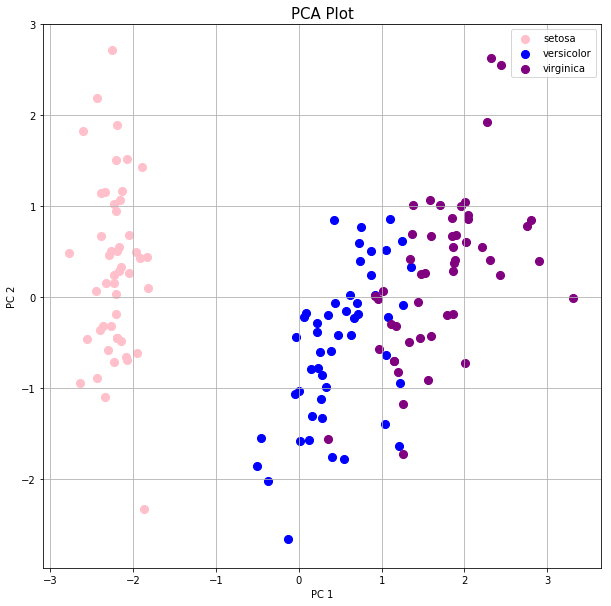

In [87]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 10)
ax.set_ylabel('PC 2', fontsize = 10)
ax.set_title('PCA Plot', fontsize = 15)

species = ['setosa', 'veriscolor', 'virginica']
colors = ['pink', 'blue', 'purple']

for species, color in zip(species,colors):
    indicesToKeep = frame['species'] == species
    ax.scatter(frame.loc[indicesToKeep, 'Principal Component 1']
               , frame.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 65)
    
ax.legend(Species)
ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)